 # Visualizion of a grib file using pygrib

pygrib will need to be installed prior to using this notebook.

In order to install pygrib, you can use conda: 

`conda install -c conda-forge pygrib`

In [1]:
import pygrib

<frozen importlib._bootstrap>:219: UserWarning: Warning: ecCodes 2.19.1 or higher is recommended. You are running 2.18.0.


In [2]:
# We'll be using widgets in the notebook
import ipywidgets as widgets 
from IPython.display import display

### Now to select a grib file
This can be any grib file, but you can use our example grib file in the `data/` directory of this repository.

In [3]:
grib_file = '../data/gdas.t12z.pgrb2.1p00.f000'

Opening a Grib file in pygrib is similar to any other file. 

Additionally, since it seeks to different byte offsets in the file, it only loads into memory what you ask.

In [4]:
fh = pygrib.open(grib_file)

In [5]:
num_messages = fh.messages
print(num_messages)

522


In [6]:
fh.message(1)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202012111200

Now we can select the variables

In [7]:
grib_messages = [(fh.message(i), i) for i in range(1,num_messages)]

w = widgets.Dropdown(
options=grib_messages,
value=1,
description="Select which grib message you would like to visualize")
display(w)

Dropdown(description='Select which grib message you would like to visualize', options=((1:Cloud mixing ratio:k…

In [53]:
w.value
fh.seek(w.value)
message = fh[w.value]
data = message.values

lats,lons = message.latlons()

### With your variable selected, we can now visualize the data.

In [32]:
import matplotlib.pyplot as plt # used to plot the data.
import cartopy.crs as ccrs # Used to georeference data.
import cartopy.util as cutil

TypeError: Number of dimensions of x (1) and y (2) do not match

/Users/rpconroy/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


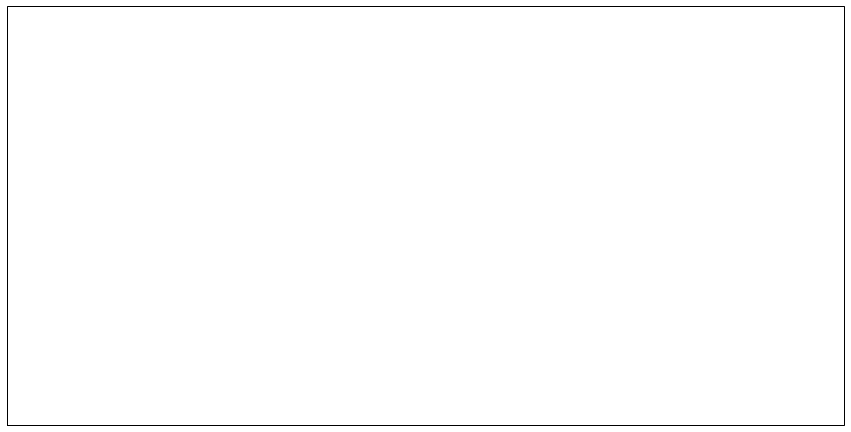

In [54]:
data, lons_1d = cutil.add_cyclic_point(data, coord=lons[0])
lons = lons_1d.data
data = data.data
proj = ccrs.PlateCarree(central_longitude=-90)
plt.gcf().set_size_inches(15,15)

ax = plt.axes(projection=proj)


plt.contourf(lons,lats,data, transform=proj)
ax.coastlines()


plt.show()


In [40]:
data, lons_1d = cutil.add_cyclic_point(data, coord=lons[0])

In order to plot this data, you may need to install librariesIn order to plot this data, you may need to install libraries. The easiest way to do this is to use conda, however any method of getting the following libraries will work.

In [58]:
lats.shape

(181, 360)

In [51]:
lons_1d.data


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
# Now to load in the data to xarray
ds = xarray.open_dataset(selected_file.value)

In [ ]:
var = widgets.Dropdown(
    options=get_primary(ds).keys(),
    description='Variable')
display(var)

In [ ]:
var = widgets.Dropdown(
proj = ccrs.Mercator()
plt.gcf().set_size_inches(20,10)
ax = plt.axes(projection=proj)
data_slice = ds[var.value].isel(time=10)
data_slice.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()